# Homework 10: Inference in SLR and MLR 
***

**Name**: Matthew Mayer

***

This assignment is due on Canvas by **6:00PM on Friday November 18**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports for this assignment:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import numpy as np 
from scipy import stats
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
%matplotlib inline


# Problem 1
***

The business of programming is exploding in growth! As a programmer, it is important to lead a well rounded life and take care of your health. We are going to look at a data set of a sample of programmers, their overall happiness and some possible influences on their happiness.

Load `happiness.csv` as a dataframe called `dfHappy` and take a look at the data.

In [2]:
# Upload here and take a look at some of the data, .head(10) perhaps.
dfHappy = pd.read_csv('happiness.csv')
dfHappy.head(10)

,Index,happiness,grmsSgr,sunlight,screentime,BMI,ff
0,1,3.427723,52.984804,41.800653,148.656740,22.770203,53
1,2,5.381479,17.620582,83.681961,67.486945,18.965722,52
2,3,4.568705,33.145561,79.765209,83.085792,25.827328,48
3,4,1.560355,68.313223,39.734337,190.733508,19.102485,24
4,5,3.057388,53.587157,51.657807,113.854519,24.970149,2
5,6,0.727221,74.666532,14.594492,254.659872,25.115974,34
6,7,1.590356,62.672605,29.642536,176.756328,25.595235,34
7,8,4.258312,26.837312,79.765056,93.379803,23.654171,57
8,9,5.381398,18.659952,67.390751,52.556721,20.888795,48
9,10,5.890149,21.423596,98.044772,47.082464,27.589727,75


### Data description:

***Index***: This is just a number listing the ID of the programmer.

***happiness***: This is the measured happiness of the programmer on a scale from 0 to 7.

***grmsSgr***: This variable measures the grams of sugar intake per day.

***BMI***: This variable is the body mass index of the individual.

***screentime***: This variable measures the daily minutes of screentime that the programmer put in on a specified day. Some are low due to that day being a research, or field day, and some are high due to that day being a coding day.

***sunlight***: This variable measures the number of minutes taken during the day to be outdoors.

***ff***: This variable measures, on a scale from 0=none to 100=immediate, access to friends and family as a support system with the programmers particular job location. 

### What affects Happiness?

We are attempting to ascertain things that affect happiness. In problem 1 this will be done with Simple Linear Regression.

Determine the affect of each predictor variable in $\color{red}{\textbf{5 steps}}$: 

$\color{red}{\textbf{1]}}$: Make a scatter plot of predictor variable versus response variable. 

$\color{red}{\textbf{2]}}$: Come up with the regression line for the relationship.

Create the same scatterplot (from Step 1) with the line of best-fit imposed on it, $\textbf{AND}$ print the actual equation along with each graph.

That is, fit and $\textbf{print}$ a linear regression model to the data of the form 

$$
Y_i = \alpha + \beta x_i \quad \textrm{for } i=1,2, \ldots, 498 
$$

$\color{red}{\textbf{3]}}$: Find a measure for the goodness of fit of the regression line.

Explain what $R^2$ means in this case.

$\color{red}{\textbf{4]}}$: Create a $99\%$ confidence interval for the slope ($\beta$) of the regression line.

From step 2, notice the $\beta$ for the happiness relationship with sugar.

Explain your results: Is your $\beta$ statistic in the confidence interval? Is 0 included in the interval? 


$\color{red}{\textbf{5]}}$: For the relationship that you think you have discovered, the question is whether its really the case or if the downward/upward trend should be attributed to chance.

Perform a hypothesis test at the $\alpha = 0.01$ significance level to determine if the observed relationship between the predictor and the response is real by testing the hypotheses: 

$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$

$\color{blue}{\text{Explain your results}}$: Is there sufficient evidence to conclude that the observed relationship between the predictor and the response happiness is real? Answer with a p-value argument. Complete each step even if you find no legitimate linear relationship between variables. So, your answer ($\color{blue}{\text{p-value argument}}$) should take into account that we ARE making (without checking) the assumptions below:


### Assumptions

To begin with, we will assume all the $\color{blue}{\text{proper conditions}}$ for doing inference on slope:

-- $\color{blue}{\text{Linear}}$: The relationship between the independent variable and the dependent variable is linear.

-- $\color{blue}{\text{Independence}}$: The noise/errors are independent.

-- $\color{blue}{\text{Normal}}$: The errors are normally distributed.

-- $\color{blue}{\text{Equal Variance}}$: Homoscedastic errors.

-- $\color{blue}{\text{Random}}$: Random errors; unbiased.


### Here are some hints/formulas that may help you:

You may want to use `.max()` and `.min()` in order to find appropriate bounds for each scatterplot.

You may want to do some calculations without using canned functions. Here are some useful formulas:

$\hat{y}=\hat{a}+\hat{b}\cdot x$

$SSE = \sum{(y-\hat{y})^2}$

$\hat{\sigma^2} = \frac{SSE}{n-2}$

$SE_{\beta}=\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}$

$t_{\hat{\beta}}=\frac{\hat{\beta}-\beta}{\sqrt{\frac{\hat{\sigma^2}}{\sum{(x-\bar{x})^2}}}}$

$\text{p-value} = 2\cdot \text{CDF}(t_{\hat{\beta}}, n-2)$

$\color{blue}{\text{(25 points) }}$ ***Perform the $\color{red}{\text{5-steps}}$ mentioned above for $\textbf{EACH}$ predictor variable.*** 

***Complete each of the 5 steps mentioned above with a title (such as those below, but replace the question mark of course) and also create any extra needed cells for coding and explanations.***



### Predictor variable = grmsSgr, Step 1.


<AxesSubplot:xlabel='grmsSgr', ylabel='happiness'>

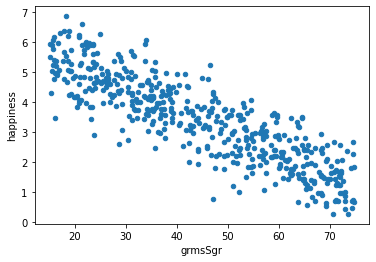

In [3]:
dfHappy.plot.scatter(x = 'grmsSgr', y = 'happiness')

### Predictor variable = grmsSgr, Step 2.


6.581163302974213  +  -0.07137617481849855 x


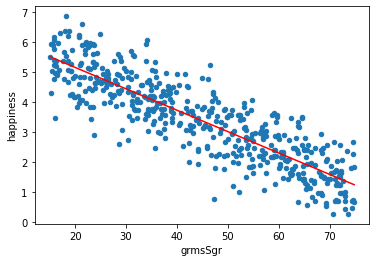

In [4]:
xbarSugar=dfHappy.loc[:, "grmsSgr"].mean()
ybar=dfHappy.loc[:, "happiness"].mean()
numeratorSugar= 0
denominatorSugar = 0
for i in range(dfHappy.loc[:, "grmsSgr"].count()):
    numeratorSugar += (dfHappy.loc[:,"grmsSgr"][i] - xbarSugar) * (dfHappy.loc[:, "happiness"][i] - ybar)
    denominatorSugar += (dfHappy.loc[:, "grmsSgr"][i] - xbarSugar) ** 2
beta1Sugar=numeratorSugar/denominatorSugar
beta0Sugar= ybar-(beta1Sugar*xbarSugar)
dfHappy.plot.scatter(x = 'grmsSgr', y = 'happiness')
xSugar = np.linspace(15,dfHappy.loc[:, "grmsSgr"].max(),100)
ySugar = beta1Sugar*xSugar+beta0Sugar
plt.plot(xSugar, ySugar, '-r')
print(beta0Sugar," + ", beta1Sugar,"x")

### Predictor variable = grmsSgr, Step 3.

In [5]:
SSESugar=0
SSTSugar = 0
for i in range(dfHappy.loc[:, "happiness"].count()):
    SSESugar+= ((dfHappy.loc[:, "happiness"][i]) - (beta0Sugar+(beta1Sugar*dfHappy.loc[:,"grmsSgr"][i])))**2
    SSTSugar+= (dfHappy.loc[:, "happiness"][i]-ybar)**2
rsquaredSugar = 1-(SSESugar/SSTSugar)
print(rsquaredSugar)
print("In this case r^2 means that the regression fits the data model fairly well.")

0.7491878907289609
In this case r^2 means that the regression fits the data model fairly well.


### Predictor variable = grmsSgr, Step 4.

In [6]:
a = 0.01
critProb = 1-(a/2)
t = stats.t.ppf(critProb,496)
SEnumeratorSugar = SSESugar/496
SEdenominatorSugar =0 
for i in range(498):
    SEdenominatorSugar += (dfHappy.loc[:, "grmsSgr"][i]-xbarSugar)**2
SEregLineSugar = np.sqrt(SEnumeratorSugar/SEdenominatorSugar)
intervalTopSugar = beta1Sugar+(t*SEregLineSugar)
intervalBottomSugar = beta1Sugar-(t*SEregLineSugar)
print("[",intervalBottomSugar, ",", intervalTopSugar, "]")

[ -0.0761711072791075 , -0.06658124235788959 ]


My $\beta$/$\beta_1$ statistic falls within my 99% confidence interval and 0 does not fall within this confidence interval. This means we can be fairly certain that our slope is correct since it falls within the range 99% of the time and 0 does not.

### Predictor variable = grmsSgr, Step 5.

Performing a hypothesis test at the $\alpha$=0.01 signifcance level to determine if the observed relationship between the predictor and the response is real by testing:

$H_0:\beta=0$

$H_1:\beta\neq0$

In [7]:
testStatSugar =(beta1Sugar-0) / SEregLineSugar
pSugar = 2*(stats.t.cdf(testStatSugar, 496))
print(pSugar)

4.5167037984343526e-151


Since p < a  we can reject the null hypothesis meaning that there is in fact a linear relationship between grams of sugar consumed and happiness. Assuming we have the proper conditions for the given assumptions of course.

### Predictor variable = sunlight, Step1.

<AxesSubplot:xlabel='sunlight', ylabel='happiness'>

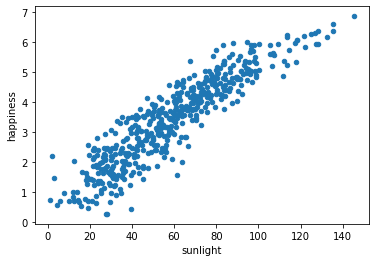

In [8]:
dfHappy.plot.scatter(x = 'sunlight', y = 'happiness')

### Predictor variable = sunlight, Step2.

0.5732973547968223  +  0.04827629411906256 x


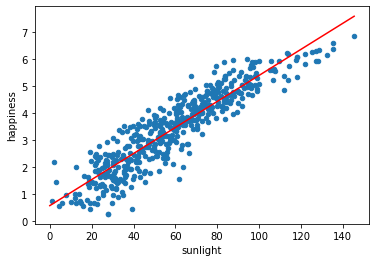

In [9]:
xbarSunlight=dfHappy.loc[:, "sunlight"].mean()
numeratorSunlight= 0
denominatorSunlight = 0
for i in range(498):
    numeratorSunlight += (dfHappy.loc[:,"sunlight"][i] - xbarSunlight) * (dfHappy.loc[:, "happiness"][i] - ybar)
    denominatorSunlight += (dfHappy.loc[:, "sunlight"][i] - xbarSunlight) ** 2
beta1Sunlight=numeratorSunlight/denominatorSunlight
beta0Sunlight= ybar-(beta1Sunlight*xbarSunlight)
dfHappy.plot.scatter(x = 'sunlight', y = 'happiness')
xSunlight = np.linspace(0,dfHappy.loc[:, "sunlight"].max(),100)
ySunlight = beta1Sunlight*xSunlight+beta0Sunlight
plt.plot(xSunlight, ySunlight, '-r')
print(beta0Sunlight," + ", beta1Sunlight,"x")

### Predictor variable = sunlight, Step3.

In [10]:
SSESunlight=0
SSTSunlight = 0
for i in range(498):
    SSESunlight+= ((dfHappy.loc[:, "happiness"][i]) - (beta0Sunlight+(beta1Sunlight*dfHappy.loc[:,"sunlight"][i])))**2
    SSTSunlight+= (dfHappy.loc[:, "happiness"][i]-ybar)**2
rsquaredSunlight = 1-(SSESunlight/SSTSunlight)
print(rsquaredSunlight)
print("In this case r^2 means that the regression fits the data model fairly well.")

0.8340432434993705
In this case r^2 means that the regression fits the data model fairly well.


### Predictor variable = sunlight, Step4.

In [11]:
SEnumeratorSunlight = SSESunlight/496
SEdenominatorSunlight =0 
for i in range(498):
    SEdenominatorSunlight += (dfHappy.loc[:, "sunlight"][i]-xbarSunlight)**2
SEregLineSunlight = np.sqrt(SEnumeratorSunlight/SEdenominatorSunlight)
intervalTopSunlight = beta1Sunlight+(t*SEregLineSunlight)
intervalBottomSunlight = beta1Sunlight-(t*SEregLineSunlight)
print("[",intervalBottomSunlight, ",", intervalTopSunlight, "]")

[ 0.04577602096156716 , 0.050776567276557966 ]


My $\beta$/$\beta_1$ statistic falls within my 99% confidence interval and 0 does not fall within this confidence interval. This means we can be fairly certain that our slope is correct since it falls within the range 99% of the time and 0 does not.

### Predictor variable = sunlight, Step5.

Performing a hypothesis test at the $\alpha$=0.01 signifcance level to determine if the observed relationship between the predictor and the response is real by testing:

$H_0:\beta=0$

$H_1:\beta\neq0$

In [12]:
testStatSunlight =(beta1Sunlight-0) / SEregLineSunlight
pSunlight = 2*(1-stats.t.cdf(testStatSunlight, 496))
print(pSunlight)

0.0


Since p < a  we can reject the null hypothesis meaning that there is in fact a linear relationship between grams of sugar consumed and happiness. Assuming we have the proper conditions for the given assumptions of course.

### Predictor variable = screentime, Step1.

<AxesSubplot:xlabel='screentime', ylabel='happiness'>

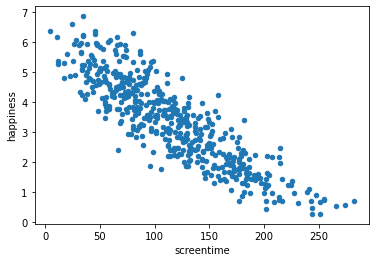

In [13]:
dfHappy.plot.scatter(x = 'screentime', y = 'happiness')

### Predictor variable = screentime, Step2.

6.041115639909412  +  -0.02306364975735365 x


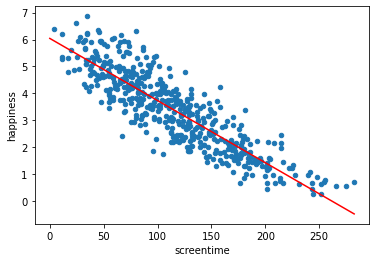

In [14]:
xbarScreen=dfHappy.loc[:, "screentime"].mean()
numeratorScreen= 0
denominatorScreen = 0
for i in range(498):
    numeratorScreen += (dfHappy.loc[:,"screentime"][i] - xbarScreen) * (dfHappy.loc[:, "happiness"][i] - ybar)
    denominatorScreen += (dfHappy.loc[:, "screentime"][i] - xbarScreen) ** 2
beta1Screen=numeratorScreen/denominatorScreen
beta0Screen= ybar-(beta1Screen*xbarScreen)
dfHappy.plot.scatter(x = 'screentime', y = 'happiness')
xScreen = np.linspace(0,dfHappy.loc[:, "screentime"].max(),100)
yScreen = beta1Screen*xScreen+beta0Screen
plt.plot(xScreen, yScreen, '-r')
print(beta0Screen," + ", beta1Screen,"x")

### Predictor variable = screentime, Step3.

In [15]:
SSEScreen=0
SSTScreen = 0
for i in range(498):
    SSEScreen+= ((dfHappy.loc[:, "happiness"][i]) - (beta0Screen+(beta1Screen*dfHappy.loc[:,"screentime"][i])))**2
    SSTScreen+= (dfHappy.loc[:, "happiness"][i]-ybar)**2
rsquaredScreen = 1-(SSEScreen/SSTScreen)
print(rsquaredScreen)
print("In this case r^2 means that the regression fits the data model fairly well.")

0.7657042983500082
In this case r^2 means that the regression fits the data model fairly well.


### Predictor variable = screentime, Step4.

In [16]:
SEnumeratorScreen = SSEScreen/496
SEdenominatorScreen =0 
for i in range(498):
    SEdenominatorScreen += (dfHappy.loc[:, "screentime"][i]-xbarScreen)**2
SEregLineScreen = np.sqrt(SEnumeratorScreen/SEdenominatorScreen)
intervalTopScreen = beta1Screen+(t*SEregLineScreen)
intervalBottomScreen = beta1Screen-(t*SEregLineScreen)
print("[",intervalBottomScreen, ",", intervalTopScreen, "]")

[ -0.024544905344008584 , -0.021582394170698717 ]


My $\beta$/$\beta_1$ statistic falls within my 99% confidence interval and 0 does not fall within this confidence interval. This means we can be fairly certain that our slope is correct since it falls within the range 99% of the time and 0 does not.

### Predictor variable = screentime, Step5.

Performing a hypothesis test at the $\alpha$=0.01 signifcance level to determine if the observed relationship between the predictor and the response is real by testing:

$H_0:\beta=0$

$H_1:\beta\neq0$

In [17]:
testStatScreen =(beta1Screen-0) / SEregLineScreen
pScreen = 2*(stats.t.cdf(testStatScreen, 496))
print(pScreen)

2.0570033369915597e-158


Since p < a  we can reject the null hypothesis meaning that there is in fact a linear relationship between grams of sugar consumed and happiness. Assuming we have the proper conditions for the given assumptions of course.

### Predictor Variable = BMI, Step1.

<AxesSubplot:xlabel='BMI', ylabel='happiness'>

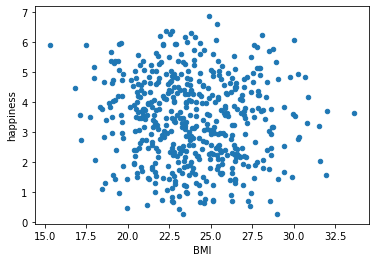

In [18]:
dfHappy.plot.scatter(x = 'BMI', y = 'happiness')

### Predictor Variable = BMI, Step2.

4.261561125045497  +  -0.03641143566499443 x


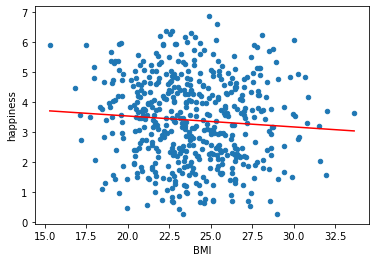

In [19]:
xbarBMI=dfHappy.loc[:, "BMI"].mean()
numeratorBMI= 0
denominatorBMI = 0
for i in range(498):
    numeratorBMI += (dfHappy.loc[:,"BMI"][i] - xbarBMI) * (dfHappy.loc[:, "happiness"][i] - ybar)
    denominatorBMI += (dfHappy.loc[:, "BMI"][i] - xbarBMI) ** 2
beta1BMI=numeratorBMI/denominatorBMI
beta0BMI= ybar-(beta1BMI*xbarBMI)
dfHappy.plot.scatter(x = 'BMI', y = 'happiness')
xBMI = np.linspace(dfHappy.loc[:, "BMI"].min(),dfHappy.loc[:, "BMI"].max(),100)
yBMI = beta1BMI*xBMI+beta0BMI
plt.plot(xBMI, yBMI, '-r')
print(beta0BMI," + ", beta1BMI,"x")

### Predictor Variable = BMI, Step3.

In [20]:
SSEBMI=0
SSTBMI = 0
for i in range(498):
    SSEBMI+= ((dfHappy.loc[:, "happiness"][i]) - (beta0BMI+(beta1BMI*dfHappy.loc[:,"BMI"][i])))**2
    SSTBMI+= (dfHappy.loc[:, "happiness"][i]-ybar)**2
rsquaredBMI = 1-(SSEBMI/SSTBMI)
print(rsquaredBMI)
print("In this case r^2 means that the regression does not fit the data model well at all.")

0.005732414956422183
In this case r^2 means that the regression does not fit the data model well at all.


### Predictor Variable = BMI, Step4.

In [21]:
SEnumeratorBMI = SSEBMI/496
SEdenominatorBMI =0 
for i in range(498):
    SEdenominatorBMI += (dfHappy.loc[:, "BMI"][i]-xbarBMI)**2
SEregLineBMI = np.sqrt(SEnumeratorBMI/SEdenominatorBMI)
intervalTopBMI = beta1BMI+(t*SEregLineBMI)
intervalBottomBMI = beta1BMI-(t*SEregLineBMI)
print("[",intervalBottomBMI, ",", intervalTopBMI, "]")

[ -0.09208781463181609 , 0.019264943301827223 ]


My $\beta$/$\beta_1$ statistic falls within my 99% confidence interval however so does 0. This means that my slope would be correct for how we determined our regression 99% of the time but it doesn't model the data well since the interval isn't constantly negative or positve because of zero. This means we don't really learn much about the data from our line or confidence interval.

### Predictor variable = BMI, Step5.

Performing a hypothesis test at the $\alpha$=0.01 signifcance level to determine if the observed relationship between the predictor and the response is real by testing:

$H_0:\beta=0$

$H_1:\beta\neq0$

In [22]:
testStatBMI =(beta1BMI-0) / SEregLineBMI
pBMI = 2*(stats.t.cdf(testStatBMI, 496))
print(pBMI)

0.09145428934378726


Since p >= a we fail to reject the null hypothesis which means there is not a linear relationship between BMI and happiness.

### Predictor variable = ff, Step1.

<AxesSubplot:xlabel='ff', ylabel='happiness'>

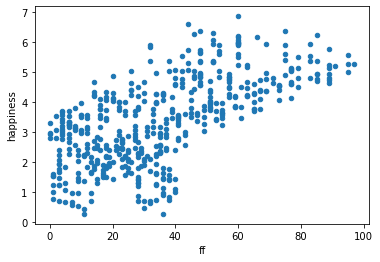

In [23]:
dfHappy.plot.scatter(x = 'ff', y = 'happiness')

### Predictor variable = ff, Step2.

1.9636454054189834  +  0.04000160183012123 x


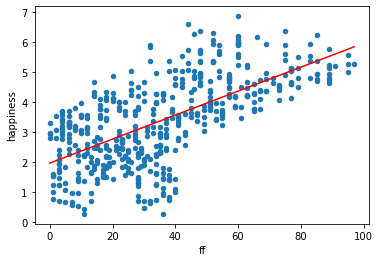

In [24]:
xbarff=dfHappy.loc[:, "ff"].mean()
numeratorff= 0
denominatorff = 0
for i in range(498):
    numeratorff += (dfHappy.loc[:,"ff"][i] - xbarff) * (dfHappy.loc[:, "happiness"][i] - ybar)
    denominatorff += (dfHappy.loc[:, "ff"][i] - xbarff) ** 2
beta1ff=numeratorff/denominatorff
beta0ff= ybar-(beta1ff*xbarff)
dfHappy.plot.scatter(x = 'ff', y = 'happiness')
xff = np.linspace(dfHappy.loc[:, "ff"].min(),dfHappy.loc[:, "ff"].max(),100)
yff = beta1ff*xff+beta0ff
plt.plot(xff, yff, '-r')
print(beta0ff," + ", beta1ff,"x")

### Predictor variable = ff, Step3.

In [25]:
SSEff=0
SSTff = 0
for i in range(498):
    SSEff+= ((dfHappy.loc[:, "happiness"][i]) - (beta0ff+(beta1ff*dfHappy.loc[:,"ff"][i])))**2
    SSTff+= (dfHappy.loc[:, "happiness"][i]-ybar)**2
rsquaredff = 1-(SSEff/SSTff)
print(rsquaredff)
print("In this case r^2 means that the regression fits the data somewhat ok.")

0.4143988161230122
In this case r^2 means that the regression fits the data somewhat ok.


### Predictor variable = ff, Step4.

In [26]:
SEnumeratorff = SSEff/496
SEdenominatorff =0 
for i in range(498):
    SEdenominatorff += (dfHappy.loc[:, "ff"][i]-xbarff)**2
SEregLineff = np.sqrt(SEnumeratorff/SEdenominatorff)
intervalTopff = beta1ff+(t*SEregLineff)
intervalBottomff = beta1ff-(t*SEregLineff)
print("[",intervalBottomff, ",", intervalTopff, "]")

[ 0.034480580161586116 , 0.04552262349865635 ]


My $\beta$/$\beta_1$ statistic falls within my 99% confidence interval and 0 does not fall within this confidence interval. This means we can be fairly certain that our slope is correct since it falls within the range 99% of the time and 0 does not.

### Predictor variable = ff, Step5.

Performing a hypothesis test at the $\alpha$=0.01 signifcance level to determine if the observed relationship between the predictor and the response is real by testing:

$H_0:\beta=0$

$H_1:\beta\neq0$

In [27]:
testStatff =(beta1ff-0) / SEregLineff
pff = 2*(stats.t.cdf(-testStatff, 496))
print(pff)

1.2862633925250878e-59


Since p < a  we can reject the null hypothesis meaning that there is in fact a linear relationship between grams of sugar consumed and happiness. Assuming we have the proper conditions for the given assumptions of course.

# Problem 2

Instead of looking at each individual predictor, fit a multiple linear regression model to the happiness data.

## Part A

***(4 points)*** Use `model = sm.OLS(y, X).fit()` to find the estimated parameters and based on these parameters estimated by the model, replace the unknown $\hat{\beta}_j$ parameters below with the actual values in the model.

$$
\texttt{happiness} = \text{constant} + \beta_{sugar} \times \texttt{grmsSgr} + \beta_{BMI} \times \texttt{BMI} + \beta_{screen} \times \texttt{screentime} + \beta_{sun}\times \texttt{sunlight} + \beta_{ff}\times \texttt{ff}
$$


In [28]:
# Code here:
# Collect the features in a 2D array 
X = dfHappy[["grmsSgr", "sunlight", "screentime", "BMI", "ff"]]
# X only stores the independent variables
#print(X)
# Add a constant to the array for the intercept 
X = sm.add_constant(X)
#print(X)
# Collect the response data in an array 
y = dfHappy["happiness"]

# Fit the ordinary least-squares (OLS) model 
#model = sm.OLS(y, X).fit()
#model.summary()
model = sm.OLS(y, X)
results = model.fit()
print(results.params)

const         4.027108
grmsSgr      -0.021068
sunlight      0.022160
screentime   -0.008401
BMI          -0.007613
ff            0.004445
dtype: float64


$\color{red}{\text{Solution for Part A, the model is...:}}$
$$
\texttt{happiness} = 4.027108 + -0.021068 \times \texttt{grmsSgr} + -0.007613 \times \texttt{BMI} + -0.008401 \times \texttt{screentime} + 0.022160\times \texttt{sunlight} + 0.004445\times \texttt{ff}
$$

### Part B

***(3 points)*** According to a p-value argument, should we discard any predictor variables?

To answer this, run `model.summary()` to check the validity of your $\beta_j$ coefficients, i.e. check to see if a given predictor variable can be eliminated from the model due to its non-relationship with the response variable, and name that variable in your solution.

In [29]:
# Code here:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1310.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          1.20e-281
Time:                        22:35:23   Log-Likelihood:                -222.53
No. Observations:                 498   AIC:                             457.1
Df Residuals:                     492   BIC:                             482.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0271      0.201     20.044      0.000       3.632       4.422
grmsSgr       -0.0211      0.002    -12.261      0.000      -0.024      -0.018
sunlight       0.0222      0.001     18.485      0.000       0.020       0.025
screentime    -0.0084      0.001    -15.680      0.000      -0.009      -0.007
BMI           -0.0076      0.006     -1.323      0.186      -0.019       0.004
ff             0.0044      0.001      4.672      0.000       0.003       0.006
==============================================================================
Omnibus:                        0.278   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.155
Skew:                          -0.026   Prob(JB):                        0.926
Kurtosis:                       3.069   Cond. No.                     1.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\color{red}{\text{Solution for Part B:}}$
We are going to eliminate the BMI variable since it is the only one where P>|t|

### Part C

***(3 points)*** Which two variables have the strongest influence on happiness?

$\color{red}{\text{Solution for Part C:}}$
Grams of sugar consumed and amount of minutes of sunlight have the strongest influence on happiness since their coefficents have the largest magnitudes.


### Part D

***(6 points)*** Find any colinearity issues in this model and create three graphs for the three biggest offending variables to get a visual of the colinearity.

In [30]:
# Code here:
dfHappy[['grmsSgr', 'BMI', 'screentime', 'sunlight', 'ff']].corr()

,grmsSgr,BMI,screentime,sunlight,ff
grmsSgr,1.000000,0.070208,0.749181,-0.788105,-0.556069
BMI,0.070208,1.000000,0.029886,-0.067274,-0.058958
screentime,0.749181,0.029886,1.000000,-0.777234,-0.539554
sunlight,-0.788105,-0.067274,-0.777234,1.000000,0.613576
ff,-0.556069,-0.058958,-0.539554,0.613576,1.000000


<AxesSubplot:xlabel='grmsSgr', ylabel='screentime'>

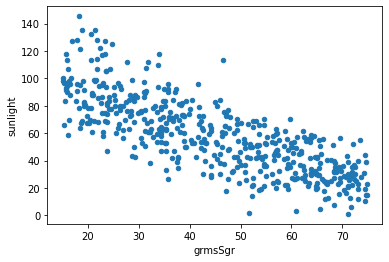

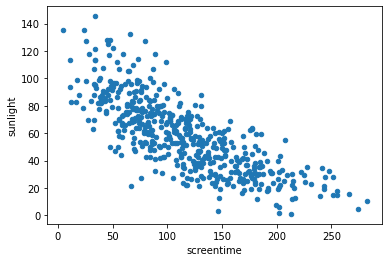

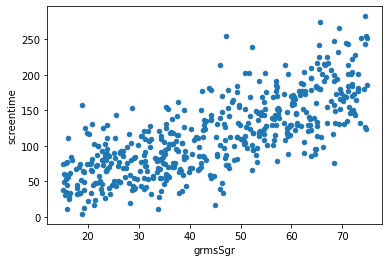

In [31]:
#Code here:
dfHappy.plot.scatter(x = 'grmsSgr', y = 'sunlight')
dfHappy.plot.scatter(x = 'screentime', y = 'sunlight')
dfHappy.plot.scatter(x = 'grmsSgr', y = 'screentime')

### Part E

***(4 points)*** Simplify the model by eliminating variables with colinearity. Choose one variable with the strongest affect on happiness and provide an SLR model. What would the linear regression model be?

0.5732973547968223  +  0.04827629411906256 x


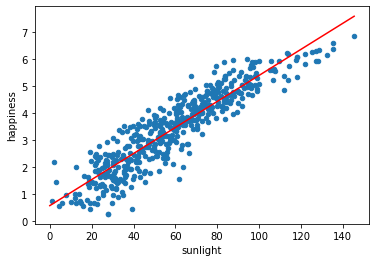

In [32]:
# Code here:
dfHappy.plot.scatter(x = 'sunlight', y = 'happiness')

plt.plot(xSunlight, ySunlight, '-r')

print(beta0Sunlight," + ", beta1Sunlight,"x")

### Rubric Check
***
***(5 points)*** Make sure your answers are thorough but not redundant. Explain your answers, don't just put a number. Make sure you have matched your questions on Gradescope. Make sure your PDF is correct and your LaTeX is correct. etc. etc. BE NEAT.

***
# End of assignment
***

# OPTIONAL (Just for fun)

*** $\color{red}{\text{No work to be done here}}$. This is just some code to play with if you are interested.***

                            OLS Regression Results                            
Dep. Variable:               sunlight   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2493.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          1.42e-195
Time:                        22:35:24   Log-Likelihood:                -1902.2
No. Observations:                 498   AIC:                             3808.
Df Residuals:                     496   BIC:                             3817.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2119      1.274     -0.166      0.8

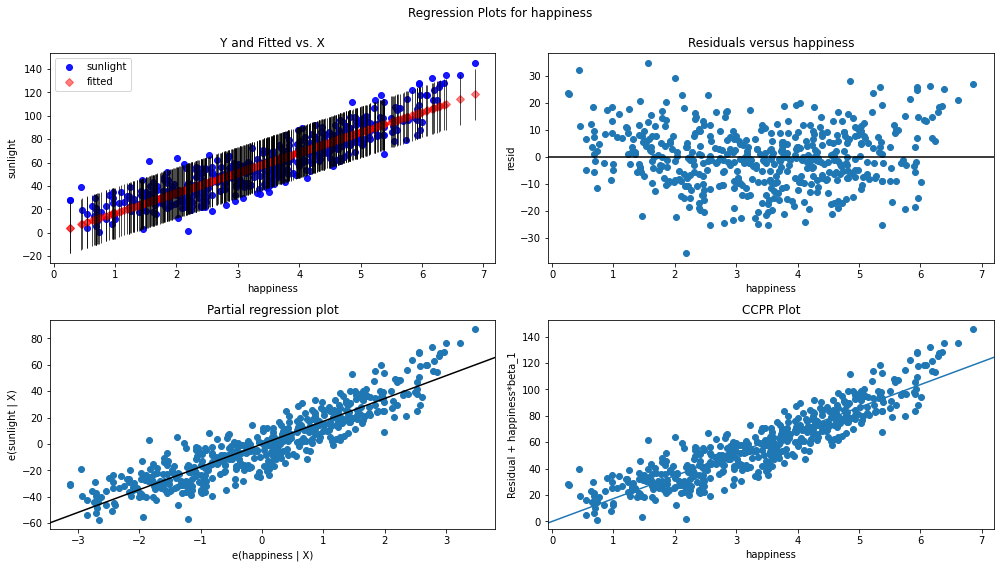

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# fit simple linear regression model
linear_model = ols('sunlight ~ happiness',
                   data=dfHappy).fit()
  
# display model summary
print(linear_model.summary())
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(linear_model,
                                    'happiness',
                                    fig=fig)